# Validation, Interpretation, Implication!

<p style="text-align: justify;"> Validation, interpretation, and implication are three of the most important steps in analyzing any statistical or economic model. Having introduced the Aggregate Supply-Aggregate Demand Model in the previous notes and the impacts of Cost-Push Inflation, the major question is whether this model serves as an accurate description of the economy and its response to changes in oil prices and Monetarist Policy.  In order to evaluate the AS-AD Model, we are going to simulate its response to changes in oil prices and broad money supply using real economic data and compare it to data on real GDP and price-level in order to graphical test for the model's validity.  Based on our historical discussions earlier in this module, we will be comparing Reserve Bank responses to economic stagflation brought on by increasing oil prices.  In order to identify the effects of Monetarist Policy, we will look at the different approaches taken by Reserve Banks in the United States and the United Kingdom.  Much of the data used in this analysis will be sourced from the World Bank, World Development Indicators, available through the [pandas_datareader API](https://pandas-datareader.readthedocs.io/).  Due to changes in the API and its dependencies, students may need to read through the documentation it requires.  A known issue is this API's compatibility issue with the newer version of the Pandas library. A comment has been added on this in the code and a specific change to one of the Pandas Modules has been added to aid in this compatibility.  You will see this across the notes.</p>
  
<p style="text-align: justify;"> In some cases, data has been scaled in order to aid in interpretability, as we are concerned with the effect and not the specific value for broad money or oil prices.  Where possible these changes have been flagged and are crucial for their inclusion in later AS-AD Model.  Our libraries remain the same as the previous set of notes, using NumPy, SciPy, HoloViews, and Pandas, with much of the code repeated from before.</p>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.wb as wb
import holoviews as hv
import hvplot.pandas
from scipy.optimize import fsolve
from scipy.stats import iqr
%matplotlib inline

In [3]:
# There is a compatilibility issue with this library \
#and newer versions of Pandas, this is short fix to the problem, \
#if you have issues at this chunk comment it out and you should be fine.  
pd.core.common.is_list_like = pd.api.types.is_list_like
# import pandas_datareader.wb as wb

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
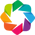

In [4]:
hv.extension('bokeh')
np.random.seed(42)

In [5]:
def P(*args, **kwargs):
    P = np.linspace(-10, 10, 100).reshape(-1,1)
    P = P[P!=0]
    return P

def AS(P=P(), W=0, P_e=1, Z_2=0):
    return P-Z_2

def AD(P=P(), M=0, G=0, T=0, Z_1=0):
    return -P+Z_1

In [6]:
def findIntersection(fun1,fun2,x0):
    return fsolve(lambda x : fun1(x) - fun2(x),x0)

In [7]:
indicators = wb.get_indicators()
indicators.head()

id                                     name  \
0    1.0.HCount.1.90usd          Poverty Headcount ($1.90 a day)   
1     1.0.HCount.2.5usd          Poverty Headcount ($2.50 a day)   
2  1.0.HCount.Mid10to50    Middle Class ($10-50 a day) Headcount   
3       1.0.HCount.Ofcl  Official Moderate Poverty Rate-National   
4   1.0.HCount.Poor4uds             Poverty Headcount ($4 a day)   

           source                                         sourceNote  \
0  LAC Equity Lab  The poverty headcount index measures the propo...   
1  LAC Equity Lab  The poverty headcount index measures the propo...   
2  LAC Equity Lab  The poverty headcount index measures the propo...   
3  LAC Equity Lab  The poverty headcount index measures the propo...   
4  LAC Equity Lab  The poverty headcount index measures the propo...   

                                  sourceOrganization    topics unit  
0  b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...  Poverty        
1  b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...  Poverty        
2  b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...  Poverty        
3  b'LAC Equity Lab tabulations of data from Nati...  Poverty        
4  b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...  Poverty

In [8]:
indicators.loc[indicators.id =='NY.GDP.PETR.RT.ZS',:]

id                  name                        source  \
7886  NY.GDP.PETR.RT.ZS  Oil rents (% of GDP)  World Development Indicators   

                                             sourceNote  \
7886  Oil rents are the difference between the value...   

                                     sourceOrganization  \
7886  b'World Bank staff estimates based on sources ...   

                               topics unit  
7886  Energy & Mining  ; Environment

In [9]:
countries = wb.get_countries()
countries.head()

adminregion capitalCity iso3c  \
0                                                 Oranjestad   ABW   
1                                     South Asia       Kabul   AFG   
2                                                              AFR   
3     Sub-Saharan Africa (excluding high income)      Luanda   AGO   
4  Europe & Central Asia (excluding high income)      Tirane   ALB   

           incomeLevel iso2c  latitude     lendingType  longitude  \
0          High income    AW  12.51670  Not classified   -70.0167   
1           Low income    AF  34.52280             IDA    69.1761   
2           Aggregates    A9       NaN      Aggregates        NaN   
3  Lower middle income    AO  -8.81155            IBRD    13.2420   
4  Upper middle income    AL  41.33170            IBRD    19.8172   

          name                      region  
0        Aruba  Latin America & Caribbean   
1  Afghanistan                  South Asia  
2       Africa                  Aggregates  
3       Angola         Sub-Saharan Africa   
4      Albania       Europe & Central Asia

<p style="text-align: justify;"> The World Bank data-portal offers a wide array of data points used to benchmark various interventions, economic growth, prosperity, education, and healthcare.  This data is extensive but often inconsistent across countries or years.  For this reason, it some cases, it is required to find appropriate proxies to capture Macroeconomic variables discussed in academia.  For tracking the real cost of oil over time, we will use the reserve banks measure of 'oil rents (% of GDP)' which is defined as "... the difference between the value of crude oil production at regional prices and total costs of production".  Data was sourced between 1970 to 2017 for use in the analysis in order to get a long run understanding of the events which led up to the crash of 1987 and the implication monetary policy and commodity prices may have on markets today.</p>
 
<p style="text-align: justify;"> The graph below shows an accurate measure for the changing economic cost of oil experienced by particular countries over time.  The graph details clear spikes in oil rents in both the US and UK, starting at around 1976, at the time of the first recession.  These reach their peak for either country at around 1980 and 1985 for the US and UK, before restoring to long-run norms. Zooming and panning through the data, you can observe greater detail in these movements as they changed over time and better understand the events at the time of the crash.</p>

In [10]:
%%opts Curve [width=800, height=450]
oil = wb.download(
    indicator='NY.GDP.PETR.RT.ZS', 
    country=['USA','GBR'], 
    start=pd.to_datetime('1970', yearfirst=True), 
    end=pd.to_datetime('2017', yearfirst=True)
)
oil = oil.reset_index().dropna()

oil_unscaled = oil

oil.loc[oil.country=='United States', 'NY.GDP.PETR.RT.ZS'] = (oil.loc[oil.country=='United States', 'NY.GDP.PETR.RT.ZS'] - 
                                                               oil.loc[oil.country=='United States', 'NY.GDP.PETR.RT.ZS'].mean())/\
                                                                iqr(oil.loc[oil.country=='United States', 'NY.GDP.PETR.RT.ZS'])

oil.loc[oil.country=='United Kingdom', 'NY.GDP.PETR.RT.ZS'] = (oil.loc[oil.country=='United Kingdom', 'NY.GDP.PETR.RT.ZS'] - 
                                                               oil.loc[oil.country=='United Kingdom', 'NY.GDP.PETR.RT.ZS'].mean())/\
                                                                iqr(oil.loc[oil.country=='United Kingdom', 'NY.GDP.PETR.RT.ZS'])

oil_plot = oil.iloc[::-1,:].hvplot.line(x='year', y='NY.GDP.PETR.RT.ZS', by='country', title='Scaled Oil rents (% of GDP)')

oil_plot

:NdOverlay   [country]
   :Curve   [year]   (NY.GDP.PETR.RT.ZS)

<p style="text-align: justify;"> In order to track Reserve Bank policy, we need to observe its effect on money markets and on money supply.  For use in these notes, we will be looking at M4 or broad money, defined as "the sum of currency outside banks; demand deposits other than those of the central government; the time, savings, and foreign currency deposits of resident sectors other than the central government; bank and traveler’s checks; and other securities such as certificates of deposit and commercial paper".  While for specific Reserve Bank interventions M0 and M1 money may be more appropriate, to understanding its implication M4 money will be used to understand its effects through the money multiplier effect.  From the graphs below, we can see around the time of 1985 strongly diverging changes in broad money between these two economic.  While the UK sees stabilizing and increasing broad money, the US experiences a drastic decline in broad money as a percent of GDP, which continued well into the 1990s.</P>

In [11]:
%%opts Curve [width=800, height=450]
money = wb.download(indicator='FM.LBL.BMNY.GD.ZS', country=['USA','GBR'], start=pd.to_datetime('1970', yearfirst=True), end=pd.to_datetime('2017', yearfirst=True))
money = money.reset_index().dropna()

money_unscaled = money

money.loc[money.country=='United States', 'FM.LBL.BMNY.GD.ZS'] = (money.loc[money.country=='United States', 'FM.LBL.BMNY.GD.ZS'] - 
                                                                  money.loc[money.country=='United States', 'FM.LBL.BMNY.GD.ZS'].mean())/\
                                                                    iqr(money.loc[money.country=='United States', 'FM.LBL.BMNY.GD.ZS'])

money.loc[money.country=='United Kingdom', 'FM.LBL.BMNY.GD.ZS'] = (money.loc[money.country=='United Kingdom', 'FM.LBL.BMNY.GD.ZS'] - 
                                                                  money.loc[money.country=='United Kingdom', 'FM.LBL.BMNY.GD.ZS'].mean())/\
                                                                    iqr(money.loc[money.country=='United Kingdom', 'FM.LBL.BMNY.GD.ZS'])

money_plot = money.iloc[::-1,:].hvplot.line(x='year', y='FM.LBL.BMNY.GD.ZS', by='country', title='Broad money (% of GDP)')

money_plot

:NdOverlay   [country]
   :Curve   [year]   (FM.LBL.BMNY.GD.ZS)

<p style="text-align: justify;"> We will be comparing this variable against real GDP or real output using a constant 2010 USD Price-Level.  Given the relationship between real GDP and our AS-AD model, we will prefer to look at real GDP per capita growth due to its scaling and interpretability. From the graphs below, it is clear that a strong correlation exists between these two countries across time, with clear evidence of recessions in 1987 and 1974.</p>

In [12]:
%%opts Curve [width=800, height=450]
gdp = wb.download(indicator='NY.GDP.PCAP.KD', country=['USA','GBR'], start=pd.to_datetime('1970', yearfirst=True), end=pd.to_datetime('2013', yearfirst=True))
gdp = gdp.reset_index()

gdp.loc[:,'NY.GDP.PCAP.KD'] = gdp.loc[:,'NY.GDP.PCAP.KD'].pct_change()

gdp = gdp.loc[pd.to_numeric(gdp.year)<=2012,:].dropna()

gdp_plot = gdp.iloc[::-1,:].hvplot.line(x='year', y='NY.GDP.PCAP.KD', by='country', title='GDP per capita growth (constant 2010 US$)')

gdp_plot

:NdOverlay   [country]
   :Curve   [year]   (NY.GDP.PCAP.KD)

<p style = 'text-align:justify'> In the interactive plot below we will use scaled values for broad money and oil rents as values of Z_2 and Z_1 for use in our AS-AD model.  Using the slider, we can more these exogenous shocks through time, observing their effect on Price-level and real GDP output.  Using the real output set at equilibria between this price we scale this equilibrium and compare it against our real GDP, shown by the red dot in the right panel of the graph, to analyze the validity of this model for use across a range of applications.  We compare these models for the UK and the US to arrive at some conclusion around the effects of Monetary Policy on the real economy and capital markets.  These models do not take into account all variable but aim to approximate an estimate of these models' predictions.</p>

In [13]:
def curves_data_US(year=1971):
    
    oil_z2 = oil.loc[oil.country=='United States', 'NY.GDP.PETR.RT.ZS'].iloc[::-1]
    oil_z2 = oil_z2 - oil_z2.iloc[0]
    
    money_z2 = money.loc[money.country=='United States', 'FM.LBL.BMNY.GD.ZS'].iloc[::-1]
    money_z2 = money_z2 -money_z2.iloc[0]
    
    z_2 = oil_z2.iloc[year-1971] -10
    
    z_1= -money_z2.iloc[year-1971]-10
    
    as_eq = pd.DataFrame([P(), AS(P=P(), Z_2=0)], index=['Price-Level','Real Output']).T
    ad_eq = pd.DataFrame([P(), AD(P=P(), Z_1=0)], index=['Price-Level','Real Output']).T
    
    as_shock = pd.DataFrame([P(), AS(P=P(), Z_2=z_2+10)], index=['Price-Level','Real Output']).T
    ad_shock = pd.DataFrame([P(), AD(P=P(), Z_1=z_1+10)], index=['Price-Level','Real Output']).T
    
    result = findIntersection(lambda x: AS(P=x, Z_2=z_2+10), lambda x: AD(P=x, Z_1=-z_1-10), 0.0)
    r = result + 1e-4 if result==0 else result
    
    plot = hv.Curve(as_eq, vdims='Price-Level',kdims='Real Output').options(alpha=0.2, color='#1BB3F5') *\
                              hv.Curve(ad_eq, vdims='Price-Level',kdims='Real Output').options(alpha=0.2, color='orange') *\
                              hv.Curve(as_shock, vdims='Price-Level',kdims='Real Output', label='AS').options(alpha=1, color='#1BB3F5') *\
                              hv.Curve(ad_shock, vdims='Price-Level',kdims='Real Output', label='AD').options(alpha=1, color='orange') *\
                              hv.VLine(-result[0]).options(color='black', alpha=0.2, line_width=1) *\
                              hv.HLine(AD(P=-r[0], Z_1=z_1+10)).options(color='black', alpha=0.2, line_width=1)
    
    gdp_mean = gdp.loc[gdp.country=='United States', 'NY.GDP.PCAP.KD'].iloc[0]
    gdp_iqr = iqr(gdp.loc[gdp.country=='United States', 'NY.GDP.PCAP.KD'])
    
    gdp_plot_US = gdp.loc[gdp.country=='United States',:].iloc[::-1,:].hvplot.line(x='year', y='NY.GDP.PCAP.KD', title='GDP per capita growth (constant 2010 US$)') *\
    hv.VLine(year).options(color='black') * pd.DataFrame([[(AD(P=-r[0], Z_1=-z_1-10))*gdp_iqr*0.3+gdp_mean*4, year]], columns=['Real Output', 'year']).hvplot.scatter(y='Real Output', x='year',color='red')
                              
    return plot.options(xticks=[0], yticks=[0], title_format="US Short-Run AS-AD Model") + gdp_plot_US

In [14]:
%%opts Curve [width=400, height=400]

hv.DynamicMap(curves_data_US, kdims=['year'], label="US Short-Run AS-AD Model")\
.redim.range(year=(1971,2007))

:DynamicMap   [year]
   :Layout
      .Overlay.I  :Overlay
         .Curve.I  :Curve   [Real Output]   (Price-Level)
         .Curve.II :Curve   [Real Output]   (Price-Level)
         .Curve.AS :Curve   [Real Output]   (Price-Level)
         .Curve.AD :Curve   [Real Output]   (Price-Level)
         .VLine.I  :VLine   [x,y]
         .HLine.I  :HLine   [x,y]
      .Overlay.II :Overlay
         .Curve.I   :Curve   [year]   (NY.GDP.PCAP.KD)
         .VLine.I   :VLine   [x,y]
         .Scatter.I :Scatter   [year]   (Real Output)

<p style="text-align: justify;"> Similarly, for the US, the AS-AD model appears fairly accurate in tracking overall trends in the data, despite certicular failures at points in time. Despite it simplicity, the AS-AD model is able to capture the important Macroeconomic dymamics providing predictive insight into the effects of global politics and macroeconomic policy on a countries economy.  It is clear that while countries respond differently to Monetary intervention, such interventions play a crucial role in managing economic crisis which we will explore in greater depth in later modules.</p>

#### Fitting model

In [15]:
'''US Oil Rents (% of GDP)'''
# Importing Oil rents for US
USoil = wb.download(indicator='NY.GDP.PETR.RT.ZS', country='USA', start=pd.to_datetime('1970', yearfirst=True), end=pd.to_datetime('2017', yearfirst=True))

# Cleaning the downloaded dataset
USoil = (
    USoil[::-1]
    .reset_index(level=0, drop=True)
    .rename(columns={'NY.GDP.PETR.RT.ZS':'USoil'})
    .dropna(axis=0)
)

# obtaining IQR data for US oil rents
USoilIQR = (USoil - USoil.mean())/ iqr(x=USoil)

'''M3 broad money supply'''
# Importing US broad money (M3)
USmoney = wb.download(indicator='FM.LBL.BMNY.GD.ZS', country='USA', start=pd.to_datetime('1970', yearfirst=True), end=pd.to_datetime('2017', yearfirst=True))

# Cleaning the downloaded dataset
USmoney = (
    USmoney[::-1]
    .reset_index(level=0, drop=True)
    .rename(columns={'FM.LBL.BMNY.GD.ZS':'US M3'})
    .dropna(axis=0)
)

# Obtaining IQR for US M3
USmoneyIQR = (USmoney - USmoney.mean())/ iqr(x=USmoney)

'''US GDP per Capita'''
# Importing US GDP per capita growth
USGDP = wb.download(indicator='NY.GDP.PCAP.KD', country='USA', start=pd.to_datetime('1970', yearfirst=True), end=pd.to_datetime('2017', yearfirst=True))

# Cleaning the downloaded dataset
USGDP = (
    USGDP[::-1]
    .reset_index(level=0, drop=True)
    .rename(columns={'NY.GDP.PCAP.KD':'US_GDP'})
    .dropna(axis=0)
    .pct_change()[1:]
)

# Obtaining IQR for US M3
USGDPIQR = (USGDP - USGDP.mean())/ iqr(x=USGDP)

Observing all the variables independently

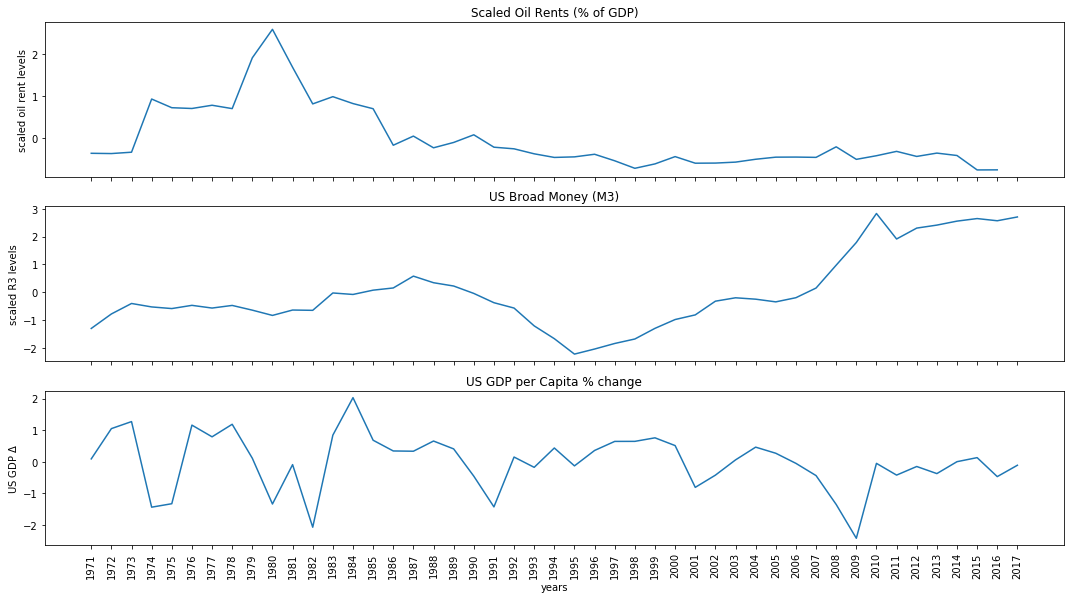

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(15,8))
axes[0].plot(USoilIQR, label='US oil rents')
axes[0].set_title('Scaled Oil Rents (% of GDP)')
axes[0].set_ylabel('scaled oil rent levels')
axes[1].plot(USmoneyIQR, label='US M3')
axes[1].set_title('US Broad Money (M3)')
axes[1].set_ylabel('scaled R3 levels')
axes[2].plot(USGDPIQR, label='US GDP per Capita')
axes[2].set_title('US GDP per Capita % change')
axes[2].set_ylabel('US GDP $\Delta$')
plt.tight_layout(True)
plt.xticks(rotation=90)
plt.xlabel('years')
plt.show()

The GDP per capita appears stationary, but the same can't be concluded for both the exogenous variable.<br> This violates gaussian and IID assumption in linear regression.

In [17]:
df = pd.merge(left=USoilIQR, right=USmoneyIQR, left_index=True, right_index=True, how='inner')
X = df['USoil']/ df['US M3']
y = USGDPIQR[:-1]

# X = pd.merge(left=oil, right=money, left_index=True, right_index=True, how='inner')
# y = GDP[:-1]

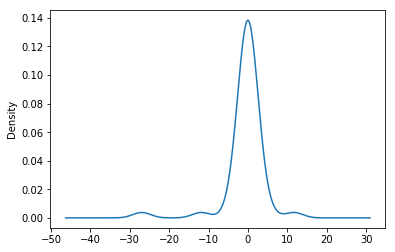

In [18]:
X.plot.kde();

With X as the ratio of money supply to price levels, the series is nearly normalized. The regression result obtained would be a little more reliable.

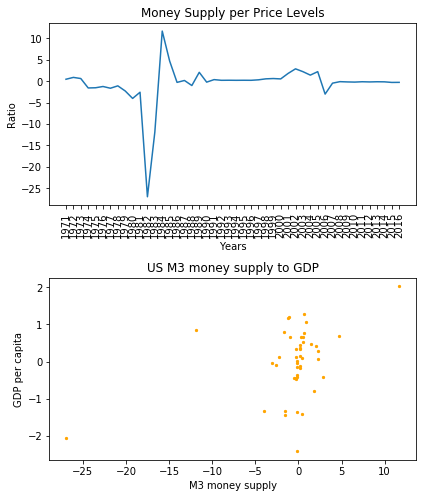

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6,7))
plt.subplot(211)
plt.plot(X, label='USoil/ US M3');
plt.title('Money Supply per Price Levels')
plt.xlabel('Years')
plt.ylabel('Ratio')
plt.xticks(rotation=90)
plt.subplot(212)
plt.scatter(x=X, y=y, s=5, color='orange');
plt.title('US M3 money supply to GDP')
plt.xlabel('M3 money supply')
plt.ylabel('GDP per capita')
plt.tight_layout(True)
plt.show()

In [20]:
from statsmodels.regression import linear_model
from statsmodels.tools import eval_measures

In [21]:
model = linear_model.OLS(endog=y, exog=X,hasconst=False)
regr = model.fit()

regr.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.146   
Dependent Variable: US_GDP           AIC:                112.9201
Date:               2018-12-17 19:25 BIC:                114.7488
No. Observations:   46               Log-Likelihood:     -55.460 
Df Model:           1                F-statistic:        8.879   
Df Residuals:       45               Prob (F-statistic): 0.00464 
R-squared:          0.165            Scale:              0.66725 
--------------------------------------------------------------------
          Coef.     Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
x1        0.0732      0.0246    2.9798    0.0046    0.0237    0.1226
-----------------------------------------------------------------
Omnibus:               4.616        Durbin-Watson:          1.300
Prob(Omnibus):         0.099        Jarque-Bera (JB):       3.411
Skew:                  -0.584       Prob(JB):               0.182
Kurtosis:              3.646        Condition No.:          1    
=================================================================

"""

In [22]:
y_pred = pd.DataFrame(data=regr.predict(exog=X), columns=['y_pred'], index=y.index)

In [23]:
print("RMSE: {}".format(eval_measures.rmse(x1=y, x2=y_pred)[0]))

RMSE: 0.8079257628947749


##### Comments

The following could be inferred from the regression summary above:
1. The model params are: $$\hat{GDP}_i=0.0732\times \frac{M3_i}{IQR(USoil)_i}$$
2. Price levels are negatively correlated to AggDem (GDP); i.e., other things being equal, at higher price levels lower the level of goods/ services are demanded and *vice versa*. <font size=1.5>(The oil rents % of GDP are assumed to be part of price levels though the oil supply shocks are the exogenous factor)</font>.
3. Money supply is positively correlated with GDP; i.e., for greater liquidity in the economy, the level of demand for goods/ services increases.
4. The exogenous variable in the above regression equation is the ratio of money supply to price levels. $>1$ implies favorable liquidity in the economy; conversly, $<1$ implies lower liquidity levels.
4. In ecnonmic parlence; GDP is fuction of the prevalent money supply per prevalent price levels, Govt. Spending, Govt. Income (real Tax), investment levels and other exogenous factors not captured above.
\begin{align}
Y&=Y^d(\frac{M}{P},G,T,I,Z_1)\\
\text{Where...}\\
Y&: \text{real GDP}\\
\frac{M}{P}&:\text{the ratio of money supply and price levels}\\
G&:\text{Govt. Spending}\\
T&:\text{Real Tax component}\\
I&:\text{Real Investments}\\
Z_1&:\text{exogenous factors not captured above}
\end{align}
5. The StdErr is 0.0246, t-score 2.9798 and $P>|t|$ was recorded at 0.0046 - all indicating a robustness of the result.
6. The reason for low $\bar{R}$ is due to the fact that other variables in the AggDem are not considered in our analysis. (out of scope of the assignment). This means, the F-stat, although at comfortable level, has scope for improvement, with addition of other variables in the equation.
7. The skewness score and excess kurtosis, confirms my above claim that the data is close to normal. The effect of slightly non-normal skewness and kurtosis could be observed in $>0$ Jarque-bera statistic.
8. The Durbin-Watson test-statistic of 1.3 indicates there is some level of serial autocorrelation present in the data. This is regerred to as stickyness. The reason for the stickyness in the data is due to the lag in effect of the policy implementation.

#### UK
We'll now conduct similar analysis for UK data (and possibly if time permits for rest of the countries asked for in the assignment).

In [24]:
def curves_data_UK(year=1971):
    
    oil_z2 = oil.loc[oil.country=='United Kingdom', 'NY.GDP.PETR.RT.ZS'].iloc[::-1]
    oil_z2 = oil_z2 - oil_z2.iloc[0]
    
    money_z2 = money.loc[money.country=='United Kingdom', 'FM.LBL.BMNY.GD.ZS'].iloc[::-1]
    money_z2 = money_z2 -money_z2.iloc[0]
    
    z_2 = oil_z2.iloc[year-1971] -10
    
    z_1= money_z2.iloc[year-1971]-10
    
    as_eq = pd.DataFrame([P(), AS(P=P(), Z_2=0)], index=['Price-Level','Real Output']).T
    ad_eq = pd.DataFrame([P(), AD(P=P(), Z_1=0)], index=['Price-Level','Real Output']).T
    
    as_shock = pd.DataFrame([P(), AS(P=P(), Z_2=z_2+10)], index=['Price-Level','Real Output']).T
    ad_shock = pd.DataFrame([P(), AD(P=P(), Z_1=z_1+10)], index=['Price-Level','Real Output']).T
    
    result = findIntersection(lambda x: AS(P=x, Z_2=z_2+10), lambda x: AD(P=x, Z_1=-z_1-10), 0.0)
    r = result + 1e-4 if result==0 else result
    
    plot = hv.Curve(as_eq, vdims='Price-Level',kdims='Real Output').options(alpha=0.2, color='#1BB3F5') *\
                              hv.Curve(ad_eq, vdims='Price-Level',kdims='Real Output').options(alpha=0.2, color='orange') *\
                              hv.Curve(as_shock, vdims='Price-Level',kdims='Real Output', label='AS').options(alpha=1, color='#1BB3F5') *\
                              hv.Curve(ad_shock, vdims='Price-Level',kdims='Real Output', label='AD').options(alpha=1, color='orange') *\
                              hv.VLine(-result[0]).options(color='black', alpha=0.2, line_width=1) *\
                              hv.HLine(AS(P=-r[0], Z_2=-z_2-10)).options(color='black', alpha=0.2, line_width=1)
    
    gdp_mean = gdp.loc[gdp.country=='United Kingdom', 'NY.GDP.PCAP.KD'].iloc[0]
    gdp_iqr = iqr(gdp.loc[gdp.country=='United Kingdom', 'NY.GDP.PCAP.KD'])
    
    gdp_plot_UK = gdp.loc[gdp.country=='United Kingdom',:].iloc[::-1,:].hvplot.line(x='year', y='NY.GDP.PCAP.KD', title='GDP per capita growth (constant 2010 US$)') *\
    hv.VLine(year).options(color='black') * pd.DataFrame([[(AD(P=r[0], Z_1=z_1+10)*gdp_iqr*0.35+2.5*gdp_mean), year]], columns=['Real Output', 'year']).hvplot.scatter(y='Real Output', x='year',color='red')
                              
    return plot.options(xticks=[0], yticks=[0], title_format="UK Short-Run AS-AD Model") + gdp_plot_UK

In [25]:
%%opts Curve [width=400, height=400]

hv.DynamicMap(curves_data_UK, kdims=['year'], label="UK Short-Run AS-AD Model")\
.redim.range(year=(1971,2007))

:DynamicMap   [year]
   :Layout
      .Overlay.I  :Overlay
         .Curve.I  :Curve   [Real Output]   (Price-Level)
         .Curve.II :Curve   [Real Output]   (Price-Level)
         .Curve.AS :Curve   [Real Output]   (Price-Level)
         .Curve.AD :Curve   [Real Output]   (Price-Level)
         .VLine.I  :VLine   [x,y]
         .HLine.I  :HLine   [x,y]
      .Overlay.II :Overlay
         .Curve.I   :Curve   [year]   (NY.GDP.PCAP.KD)
         .VLine.I   :VLine   [x,y]
         .Scatter.I :Scatter   [year]   (Real Output)

Looking at the graphs for UK GDP per capita growth and our AS-AD model, it is clear that while our model fails to account for the peaks in GDP per capita growth in 1973 and 1979, it does appear stationary at those points in time indicative of our comparison between real GDP and real GDP growth camputed in this graph.  Overall the model seems to account well for the overall trend, including growth in 1990 in the mid-2000s.  

In [26]:
'''UK Oil Rents (% of GDP)'''
# Importing Oil rents for US
UKoil = wb.download(indicator='NY.GDP.PETR.RT.ZS', country='GBR', start=pd.to_datetime('1970', yearfirst=True), end=pd.to_datetime('2017', yearfirst=True))

# Cleaning the downloaded dataset
UKoil = (
    UKoil[::-1]
    .reset_index(level=0, drop=True)
    .rename(columns={'NY.GDP.PETR.RT.ZS':'UKoil'})
    .dropna(axis=0)
)

# obtaining IQR data for US oil rents
UKoilIQR = (UKoil - UKoil.mean())/ iqr(x=UKoil)

'''M3 broad money supply'''
# Importing US broad money (M3)
UKmoney = wb.download(indicator='FM.LBL.BMNY.GD.ZS', country='GBR', start=pd.to_datetime('1970', yearfirst=True), end=pd.to_datetime('2017', yearfirst=True))

# Cleaning the downloaded dataset
UKmoney = (
    UKmoney[::-1]
    .reset_index(level=0, drop=True)
    .rename(columns={'FM.LBL.BMNY.GD.ZS':'UK M3'})
    .dropna(axis=0)
)

# Obtaining IQR for US M3
UKmoneyIQR = (UKmoney - UKmoney.mean())/ iqr(x=UKmoney)

'''UK GDP per Capita'''
# Importing US GDP per capita growth
UKGDP = wb.download(indicator='NY.GDP.PCAP.KD', country='GBR', start=pd.to_datetime('1970', yearfirst=True), end=pd.to_datetime('2017', yearfirst=True))

# Cleaning the downloaded dataset
UKGDP = (
    UKGDP[::-1]
    .reset_index(level=0, drop=True)
    .rename(columns={'NY.GDP.PCAP.KD':'UK_GDP'})
    .dropna(axis=0)
    .pct_change()[1:]
)

# Obtaining IQR for US M3
UKGDPIQR = (UKGDP - UKGDP.mean())/ iqr(x=UKGDP)

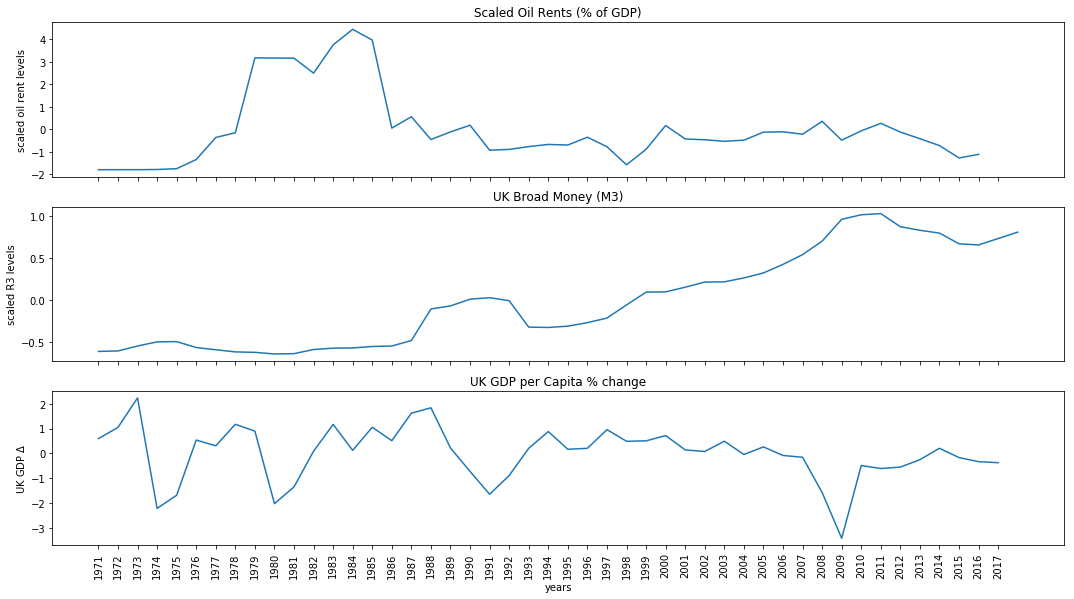

In [27]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(15,8))
axes[0].plot(UKoilIQR, label='UK oil rents')
axes[0].set_title('Scaled Oil Rents (% of GDP)')
axes[0].set_ylabel('scaled oil rent levels')
axes[1].plot(UKmoneyIQR, label='UK M3')
axes[1].set_title('UK Broad Money (M3)')
axes[1].set_ylabel('scaled R3 levels')
axes[2].plot(UKGDPIQR, label='UK GDP per Capita')
axes[2].set_title('UK GDP per Capita % change')
axes[2].set_ylabel('UK GDP $\Delta$')
plt.tight_layout(True)
plt.xticks(rotation=90)
plt.xlabel('years')
plt.show()

In [28]:
df = pd.merge(left=UKoilIQR, right=UKmoneyIQR, left_index=True, right_index=True, how='inner')
X = df['UKoil']/ df['UK M3']
y = UKGDPIQR[:-1]

# X = pd.merge(left=oil, right=money, left_index=True, right_index=True, how='inner')
# y = GDP[:-1]

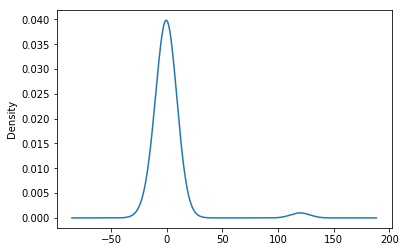

In [29]:
X.plot.kde();

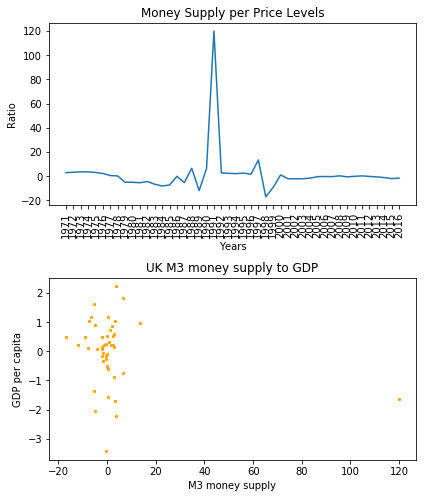

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6,7))
plt.subplot(211)
plt.plot(X, label='UKoil/ UK M3');
plt.title('Money Supply per Price Levels')
plt.xlabel('Years')
plt.ylabel('Ratio')
plt.xticks(rotation=90)
plt.subplot(212)
plt.scatter(x=X, y=y, s=5, color='orange');
plt.title('UK M3 money supply to GDP')
plt.xlabel('M3 money supply')
plt.ylabel('GDP per capita')
plt.tight_layout(True)
plt.show()

In [31]:
model = linear_model.OLS(endog=y, exog=X,hasconst=False)
regr = model.fit()

regr.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.027   
Dependent Variable: UK_GDP           AIC:                137.8405
Date:               2018-12-17 19:26 BIC:                139.6692
No. Observations:   46               Log-Likelihood:     -67.920 
Df Model:           1                F-statistic:        2.282   
Df Residuals:       45               Prob (F-statistic): 0.138   
R-squared:          0.048            Scale:              1.1470  
--------------------------------------------------------------------
        Coef.     Std.Err.       t       P>|t|      [0.025    0.975]
--------------------------------------------------------------------
x1     -0.0130      0.0086    -1.5107    0.1379    -0.0303    0.0043
-----------------------------------------------------------------
Omnibus:               9.795        Durbin-Watson:          1.312
Prob(Omnibus):         0.007        Jarque-Bera (JB):       9.753
Skew:                  -0.838       Prob(JB):               0.008
Kurtosis:              4.509        Condition No.:          1    
=================================================================

"""

In [32]:
y_pred = pd.DataFrame(data=regr.predict(exog=X), columns=['y_pred'], index=y.index)

In [33]:
print("RMSE: {}".format(eval_measures.rmse(x1=y, x2=y_pred)[0]))

RMSE: 1.059279703581883


##### Comments

The following could be inferred from the regression summary above:
1. The model params are: $$\hat{UKGDP}_i=-0.0130\times \frac{M3_i}{IQR(UKoil)_i}$$
2. The StdErr is 0.0086, t-score -1.5107 and $P>|t|$ was recorded at 0.1379 - thsidee p-value is on the higher .
3. The $\bar{R}_i$ for the UK GDP model is too negligible for the model to be considered. There is no clear trend indicated by the AD-AS model.
4. There is greater skewness and excess kurtosis observed in the UK data as compared to US data. The Jarque-Bera test reflects this fact in $3x$ higher score compared to US data.
5. The Durbin-Watson test-statistic of ~1.3 indicates there is some level of serial autocorrelation present in the data. This is regerred to as stickyness. The reason for the stickyness in the data is due to the lag in effect of the policy implementation.

#### Canada

In [42]:
'''Canada Oil Rents (% of GDP)'''
# Importing Oil rents for US
CAoil = wb.download(indicator='NY.GDP.PETR.RT.ZS', country='CAN', start=pd.to_datetime('1970', yearfirst=True), end=pd.to_datetime('2017', yearfirst=True))

# Cleaning the downloaded dataset
CAoil = (
    CAoil[::-1]
    .reset_index(level=0, drop=True)
    .rename(columns={'NY.GDP.PETR.RT.ZS':'CAoil'})
    .dropna(axis=0)
)

# obtaining IQR data for US oil rents
CAoilIQR = (CAoil - CAoil.mean())/ iqr(x=CAoil)

'''M3 broad money supply'''
# Importing US broad money (M3)
CAmoney = wb.download(indicator='FM.LBL.BMNY.GD.ZS', country='CAN', start=pd.to_datetime('1970', yearfirst=True), end=pd.to_datetime('2017', yearfirst=True))

# Cleaning the downloaded dataset
CAmoney = (
    CAmoney[::-1]
    .reset_index(level=0, drop=True)
    .rename(columns={'FM.LBL.BMNY.GD.ZS':'CA_M3'})
    .dropna(axis=0)
)

# Obtaining IQR for US M3
CAmoneyIQR = (CAmoney - CAmoney.mean())/ iqr(x=CAmoney)

'''CA GDP per Capita'''
# Importing US GDP per capita growth
CAGDP = wb.download(indicator='NY.GDP.PCAP.KD', country='CAN', start=pd.to_datetime('1970', yearfirst=True), end=pd.to_datetime('2017', yearfirst=True))

# Cleaning the downloaded dataset
CAGDP = (
    CAGDP[::-1]
    .reset_index(level=0, drop=True)
    .rename(columns={'NY.GDP.PCAP.KD':'CA_GDP'})
    .dropna(axis=0)
    .pct_change()[1:]
)

# Obtaining IQR for US M3
CAGDPIQR = (CAGDP - CAGDP.mean())/ iqr(x=CAGDP)

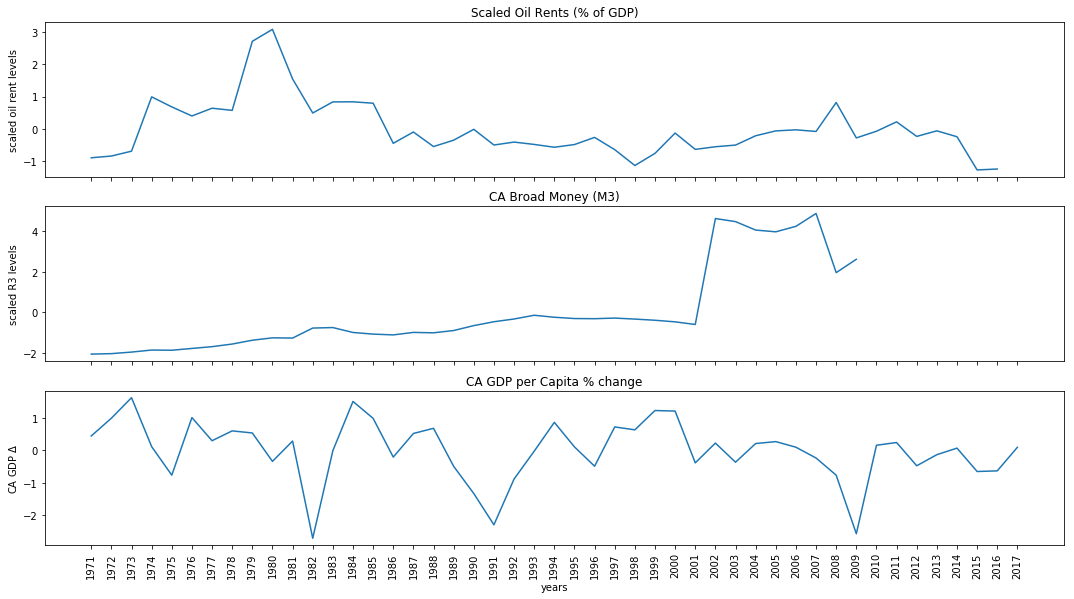

In [43]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(15,8))
axes[0].plot(CAoilIQR, label='CA oil rents')
axes[0].set_title('Scaled Oil Rents (% of GDP)')
axes[0].set_ylabel('scaled oil rent levels')
axes[1].plot(CAmoneyIQR, label='CA_M3')
axes[1].set_title('CA Broad Money (M3)')
axes[1].set_ylabel('scaled R3 levels')
axes[2].plot(CAGDPIQR, label='CA GDP per Capita')
axes[2].set_title('CA GDP per Capita % change')
axes[2].set_ylabel('CA GDP $\Delta$')
plt.tight_layout(True)
plt.xticks(rotation=90)
plt.xlabel('years')
plt.show()

In [51]:
df = pd.merge(left=CAoilIQR, right=CAmoneyIQR, left_index=True, right_index=True, how='inner')
X = df['CAoil']/ df['CA_M3']
y = CAGDPIQR[:-9]

# X = pd.merge(left=oil, right=money, left_index=True, right_index=True, how='inner')
# y = GDP[:-1]

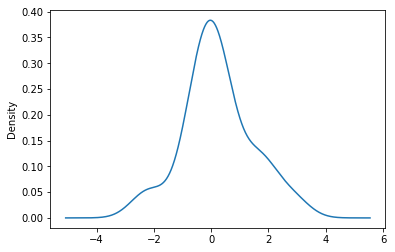

In [53]:
X.plot.kde();

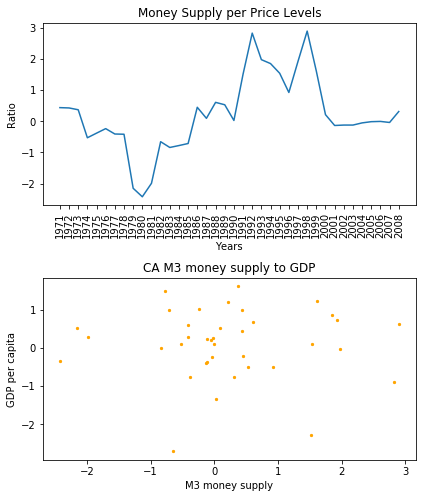

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6,7))
plt.subplot(211)
plt.plot(X, label='CAoil/ CA_M3');
plt.title('Money Supply per Price Levels')
plt.xlabel('Years')
plt.ylabel('Ratio')
plt.xticks(rotation=90)
plt.subplot(212)
plt.scatter(x=X, y=y, s=5, color='orange');
plt.title('CA M3 money supply to GDP')
plt.xlabel('M3 money supply')
plt.ylabel('GDP per capita')
plt.tight_layout(True)
plt.show()

In [55]:
model = linear_model.OLS(endog=y, exog=X, hasconst=False)
regr = model.fit()

regr.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     -0.027  
Dependent Variable: CA_GDP           AIC:                103.1847
Date:               2018-12-17 20:03 BIC:                104.8223
No. Observations:   38               Log-Likelihood:     -50.592 
Df Model:           1                F-statistic:        0.005016
Df Residuals:       37               Prob (F-statistic): 0.944   
R-squared:          0.000            Scale:              0.86204 
--------------------------------------------------------------------
         Coef.     Std.Err.      t       P>|t|      [0.025    0.975]
--------------------------------------------------------------------
x1       0.0089      0.1257    0.0708    0.9439    -0.2458    0.2636
-----------------------------------------------------------------
Omnibus:              10.833       Durbin-Watson:          1.347 
Prob(Omnibus):        0.004        Jarque-Bera (JB):       10.385
Skew:                 -1.031       Prob(JB):               0.006 
Kurtosis:             4.519        Condition No.:          1     
=================================================================

"""

In [56]:
y_pred = pd.DataFrame(data=regr.predict(exog=X), columns=['y_pred'], index=y.index)

In [57]:
print("RMSE: {}".format(eval_measures.rmse(x1=y, x2=y_pred)[0]))

RMSE: 0.9161635892898086


##### Comments

The following could be inferred from the regression summary above:
1. The model params are: $$\hat{CAGDP}_i=0.0089\times \frac{M3_i}{IQR(CAoil)_i}$$
2. The StdErr is 0.1257, t-score 0.0708 and $P>|t|$ was recorded at 0.9439 - not a robust measure.
3. The $\bar{R}_i$ for the CA GDP model is ~0. There is no clear trend indicated by the AD-AS model.
4. There is greater skewness and excess kurtosis observed in the CA data as compared to US data. The Jarque-Bera test reflects this fact in $3x$ higher score compared to US data.
5. The Durbin-Watson test-statistic of ~1.3 indicates there is some level of serial autocorrelation present in the data. This is regerred to as stickyness. The reason for the stickyness in the data is due to the lag in effect of the policy implementation.
The variation in the ratio of money supply to price levels (as indicated by oil rents), for Canada, does not explain the variation in GDP per capita.<br> Possible reason to conjucture, for low correlation between $\frac{M}{P}$ and Canadian GDP per capita could be:
1. Canada is oil exporting country, meaning it was not as badly hit by oil embargo in 1970s. Plus Canada's oil consumption is less than that of US, both in proportion and in quantity.
2. The following graph and descriptive statistics for US and Canada M3 shows Canada money supply had higher volatily than that for US. Further, comparing the 2008 subprime crises, there was increase in money supply in US by a decline in Canada.

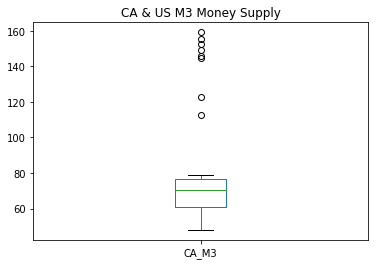

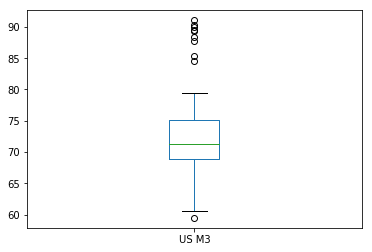

CA_M3      US M3
count   39.000000  47.000000
mean    80.950244  73.400476
std     33.749457   8.468273
min     47.915658  59.483195
25%     60.694115  68.906342
50%     70.454810  71.213125
75%     76.747725  75.144466
max    159.178683  91.059947

In [74]:
CAmoney.plot.box();
plt.title('CA & US M3 Money Supply')
USmoney.plot.box();
plt.show()

pd.concat((CAmoney.describe(),USmoney.describe()), axis=1)

- Comparing the effects of oil rents, M3 money supply on GDP per capita for US, UK & Canada suggests the data is noisy, sparse (a quaterly data would be helpful). 
- Other than for US, no significant linear relationship was observed from the available data for UK and Canada. US contains more outliers.